<a href="https://colab.research.google.com/github/caltunay/selfIsolation_refreshers/blob/main/cifar10_CV_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.datasets import cifar10

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape

170500096/170498071 [==============================] - 13s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
y_train.shape

(50000, 1)

[1]


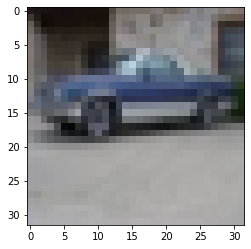

In [ ]:
plt.imshow(X_train[10000])
print(y_train[10000]) # to check the label of image

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


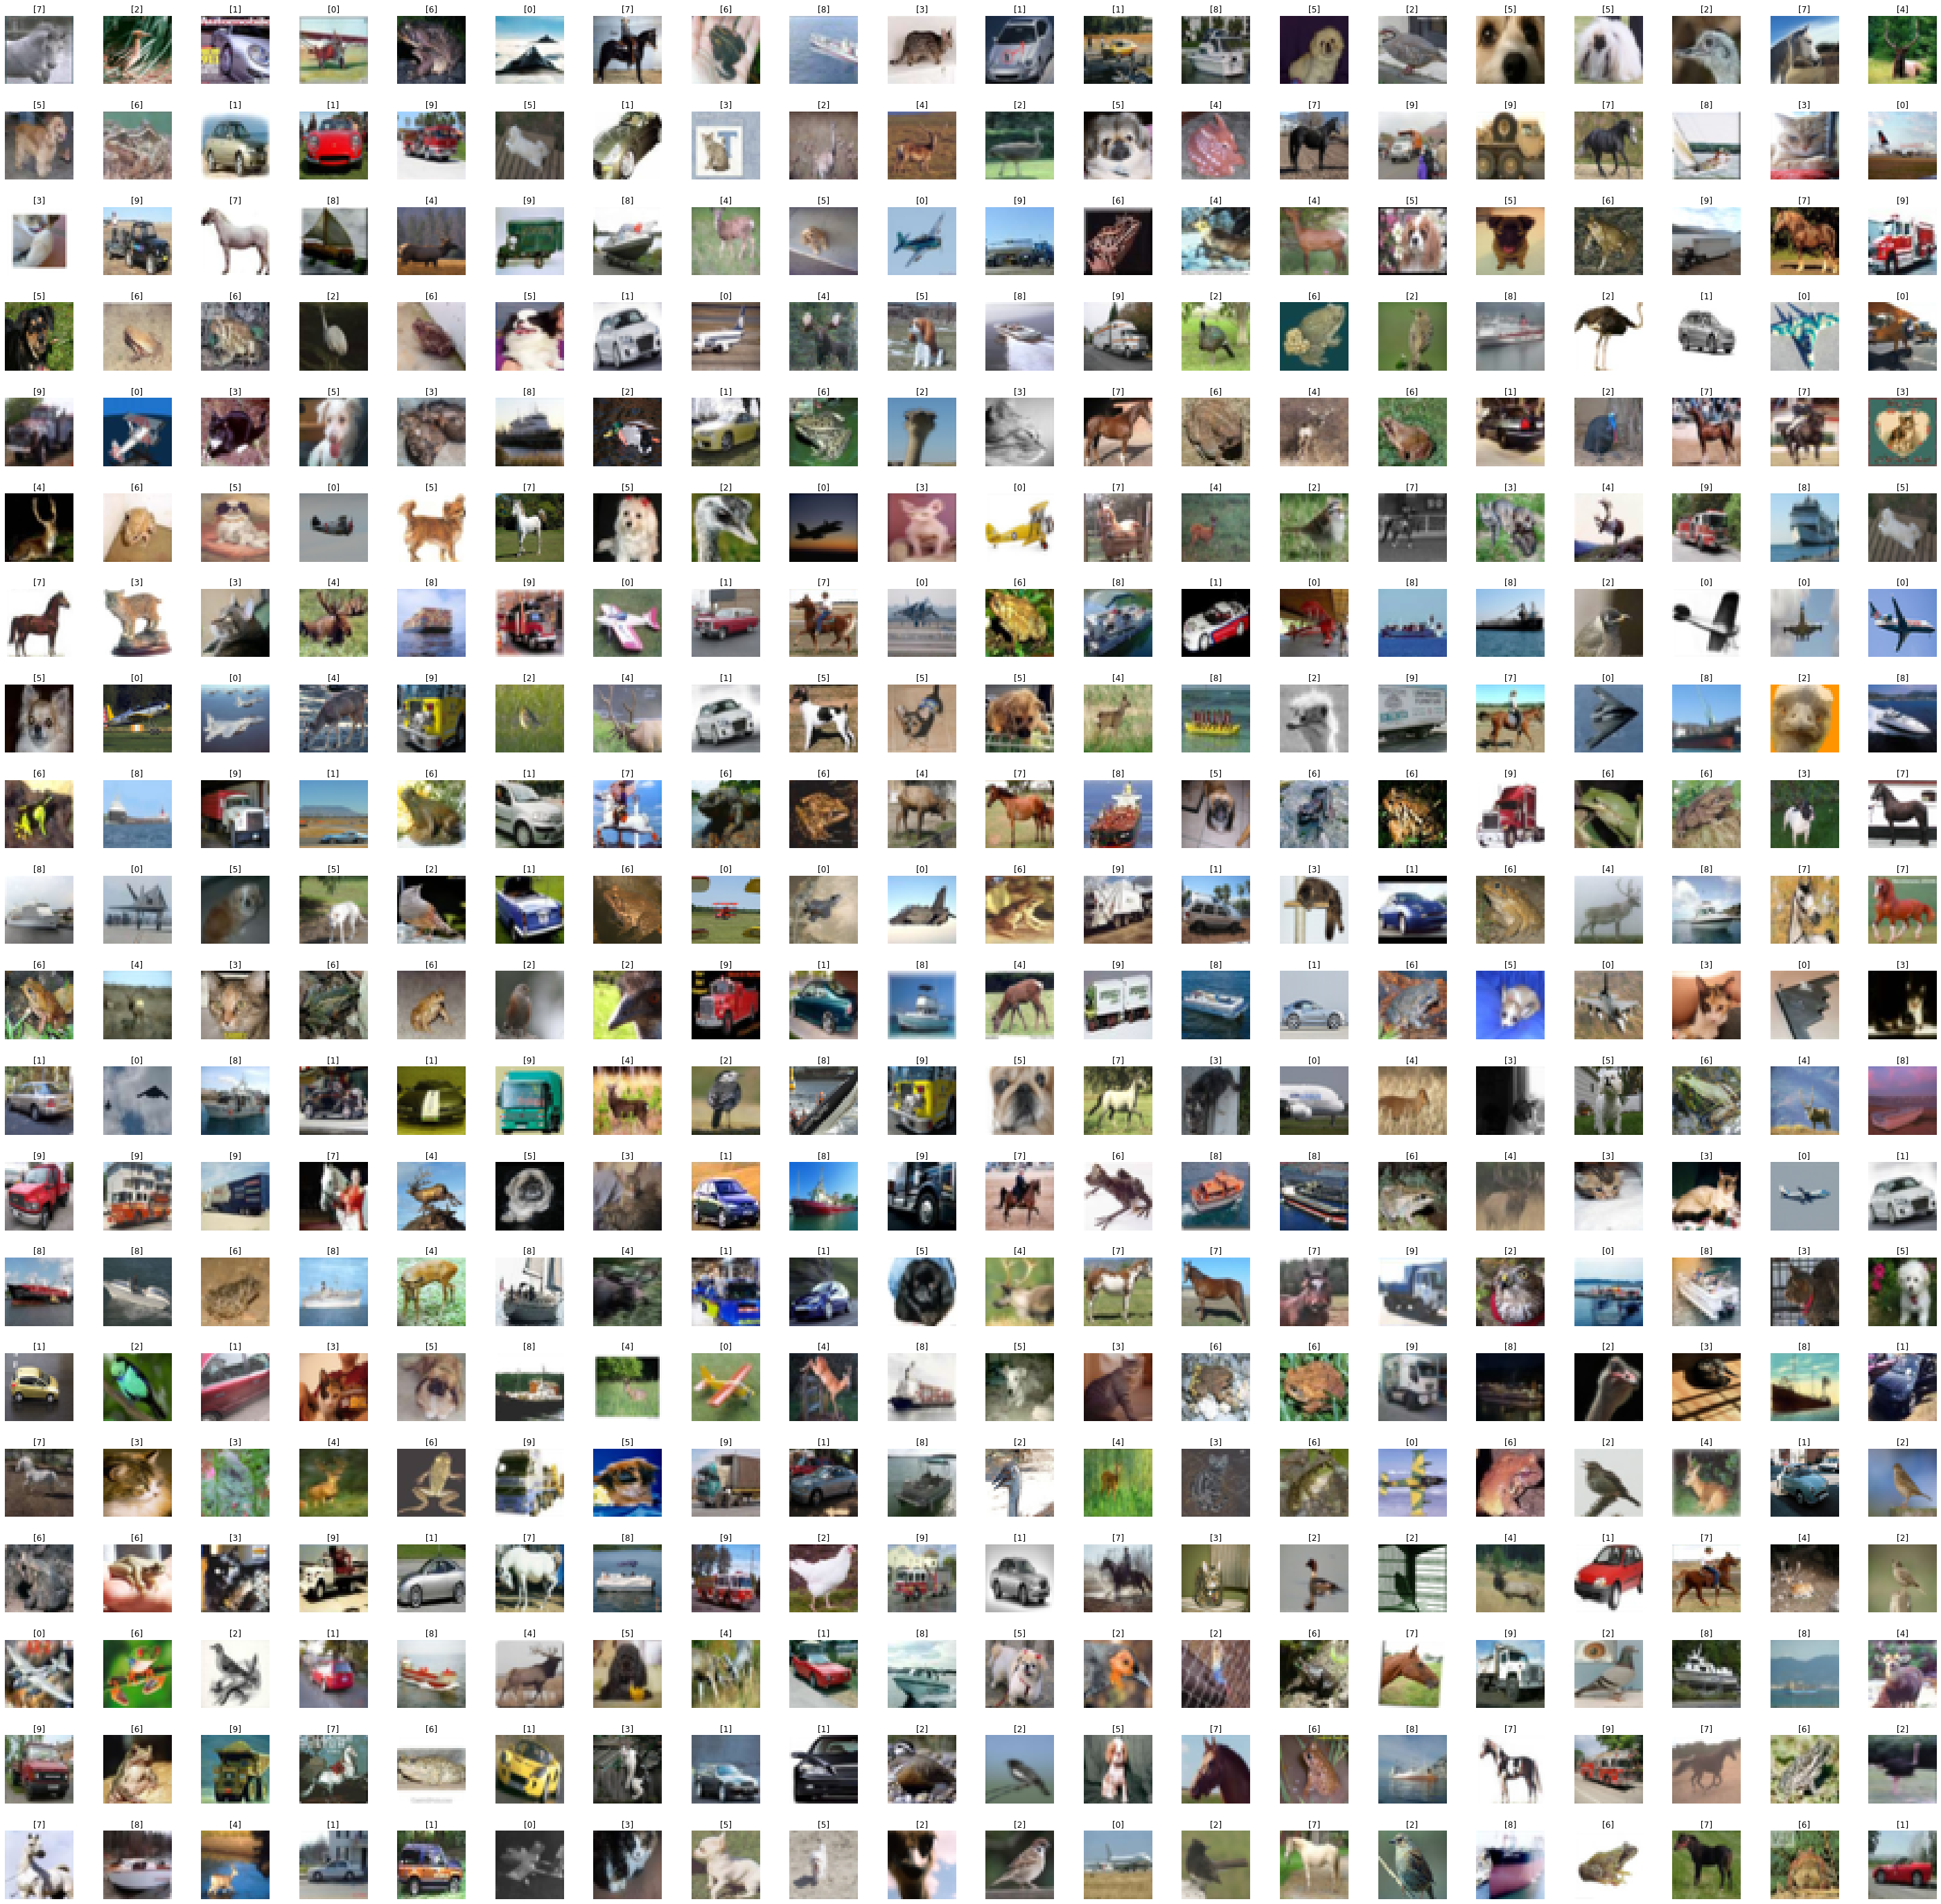

In [ ]:
W_grid = 20
L_grid = 20

fig, axes = plt.subplots(W_grid, L_grid, figsize = (50, 50))
axes = axes.ravel()

n_training = len(X_train)



for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training) # create index to pick random pics //better way to do it would be creating index independent of for loop, so there would be iterations.
    axes[i].imshow(X_train[index]) 
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace = .4, wspace = .4)

Convert target value to categorical (dummify)

Normalize input values

define input shape to prep for model

 

In [ ]:
from keras.utils import to_categorical

In [ ]:
num_categories = len(np.unique(y_train))

y_train_cats = to_categorical(y = y_train, num_classes = num_categories)
y_test_cats = to_categorical(y = y_test, num_classes = num_categories)

In [ ]:
X_train_normalized = X_train / 255
X_test_normalized = X_test / 255

In [ ]:
X_train_normalized.dtype

dtype('float64')

In [ ]:
# set input shape (50000, 32, 32, 3)
input_shape = X_train_normalized.shape[1:]

In [ ]:
# start model

# import libraries and frameworks, conv2d, maxpooling2d, averagepooling2d, flatten, dense, sequential, dropout, adam, tensorboard

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam, RMSprop
from keras.callbacks import TensorBoard

In [ ]:
input_shape

(32, 32, 3)

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 128, kernel_size = (4, 4), activation = 'relu', input_shape = input_shape))
model.add(Conv2D(filters = 128, kernel_size = (4, 4), activation = 'relu'))

model.add(MaxPooling2D(2,2))

model.add(Dropout(.3))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

# model.compile()

# model.fit(X_train_normalized, y_train_normalized)

In [ ]:
model.compile(optimizer = RMSprop(), loss = 'categorical_crossentropy', metrics = 'accuracy')

In [ ]:
history = model.fit(X_train_normalized, y_train_cats, batch_size = 64, epochs = 100, shuffle = True)

Epoch 1/100
 11/782 [..............................] - ETA: 19:16 - loss: 4.4870 - accuracy: 0.1051